Training Logistic Regression...
Accuracy: 0.8513
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90    117878
         1.0       0.80      0.63      0.71     46926

    accuracy                           0.85    164804
   macro avg       0.83      0.78      0.80    164804
weighted avg       0.85      0.85      0.85    164804

--------------------------------------------------
Training Decision Tree...
Accuracy: 0.9384
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96    117878
         1.0       0.88      0.91      0.89     46926

    accuracy                           0.94    164804
   macro avg       0.92      0.93      0.92    164804
weighted avg       0.94      0.94      0.94    164804

--------------------------------------------------
Training Random Forest...
Accuracy: 0.9602
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97    117878


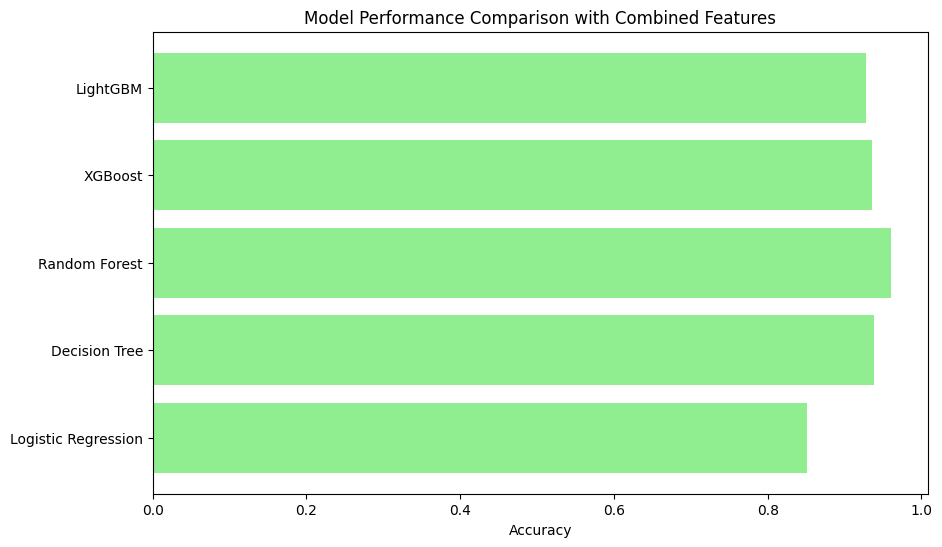

In [1]:
# # Import Libraries
# import re
# import pandas as pd
# from collections import Counter
# import math
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# # from catboost import CatBoostClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.neighbors import KNeighborsClassifier
# import warnings
# warnings.filterwarnings('ignore')

# # Feature Extraction Function
# SUSPICIOUS_WORDS = ['login', 'signin', 'bank', 'update', 'verify', 'secure', 'account', 'password', 'confirm', 'free']
# URL_SHORTENERS = ['bit.ly', 'tinyurl.com', 'goo.gl', 'is.gd', 't.co']

# def calculate_entropy(url):
#     """Calculate Shannon entropy of a URL."""
#     p, lns = Counter(url), float(len(url))
#     return -sum(count / lns * math.log2(count / lns) for count in p.values())

# def extract_features(url):
#     domain = re.findall(r'://([^/]+)', url)
#     domain = domain[0] if domain else ''
#     return {
#         'url_length': len(url),
#         'num_digits': len(re.findall(r'\d', url)),
#         'num_special_chars': len(re.findall(r'[!@#$%^&*(),.?":{}|<>]', url)),
#         'num_subdomains': url.count('.') - 1,
#         'contains_https': int('https' in url),
#         'contains_ip': int(bool(re.match(r'^(?:\d{1,3}\.){3}\d{1,3}', url))),
#         'has_suspicious_words': int(any(word in url.lower() for word in SUSPICIOUS_WORDS)),
#         'is_shortened_url': int(any(shortener in url for shortener in URL_SHORTENERS)),
#         'url_entropy': calculate_entropy(url),
#         'num_params': url.count('&') + url.count('?'),
#         '0s_in_url': url.count('0'),
#         'domain_length': len(domain)
#     }

# # Load and Preprocess Data
# file_path = './data/phishing_site_urls.csv'
# df = pd.read_csv(file_path)

# # Extract features
# features_df = pd.DataFrame(df['URL'].apply(lambda x: extract_features(x)).tolist())
# features_df['Label'] = df['Label'].map({'good': 0, 'bad': 1})  # Encode labels

# # drop rows with missing values
# features_df.dropna(inplace=True)

# # Split Data
# X = features_df.drop(columns=['Label'])
# y = features_df['Label']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# # Define Models
# models = {
#     'Logistic Regression': LogisticRegression(),
#     'Decision Tree': DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier(),
#     # 'Support Vector Machine': SVC(),
#     'K-Nearest Neighbors': KNeighborsClassifier(),
#     # 'Naive Bayes': MultinomialNB(),
#     'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
#     'LightGBM': LGBMClassifier(),
#     # 'CatBoost': CatBoostClassifier(verbose=0)
# }

# # Train and Evaluate Models
# results = {}
# for name, model in models.items():
#     print(f"Training {name}...")
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)
#     results[name] = acc
#     print(f"Accuracy: {acc:.4f}")
#     print(classification_report(y_test, y_pred))
#     print("-" * 50)

# # Display Model Comparison
# print("Model Comparison:")
# for name, acc in results.items():
#     print(f"{name}: {acc:.4f}")

# # Plot Accuracy
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 6))
# plt.barh(list(results.keys()), list(results.values()), color='skyblue')
# plt.xlabel('Accuracy')
# plt.title('Model Performance Comparison')
# plt.show()


# Import Libraries
import re
import pandas as pd
from collections import Counter
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack  # To combine sparse and dense matrices
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Feature Extraction Function
SUSPICIOUS_WORDS = ['login', 'signin', 'bank', 'update', 'verify', 'secure', 'account', 'password', 'confirm', 'free']
URL_SHORTENERS = ['bit.ly', 'tinyurl.com', 'goo.gl', 'is.gd', 't.co']

def calculate_entropy(url):
    """Calculate Shannon entropy of a URL."""
    p, lns = Counter(url), float(len(url))
    return -sum(count / lns * math.log2(count / lns) for count in p.values())

def extract_features(url):
    domain = re.findall(r'://([^/]+)', url)
    domain = domain[0] if domain else ''
    return {
        'url_length': len(url),
        'num_digits': len(re.findall(r'\d', url)),
        'num_special_chars': len(re.findall(r'[!@#$%^&*(),.?":{}|<>]', url)),
        'num_subdomains': url.count('.') - 1,
        'contains_https': int('https' in url),
        'contains_ip': int(bool(re.match(r'^(?:\d{1,3}\.){3}\d{1,3}', url))),
        'has_suspicious_words': int(any(word in url.lower() for word in SUSPICIOUS_WORDS)),
        'is_shortened_url': int(any(shortener in url for shortener in URL_SHORTENERS)),
        'url_entropy': calculate_entropy(url),
        'num_params': url.count('&') + url.count('?'),
        '0s_in_url': url.count('0'),
        'domain_length': len(domain)
    }

# Load Data
file_path = './data/phishing_site_urls.csv'  # Change this to your file path
df = pd.read_csv(file_path)

# Extract Manual Features
features_df = pd.DataFrame(df['URL'].apply(lambda x: extract_features(x)).tolist())
features_df['Label'] = df['Label'].map({'good': 0, 'bad': 1})  # Encode labels
features_df.dropna(inplace=True)  # Drop rows with missing values

# Align Original Dataset with Filtered Rows
df_aligned = df.loc[features_df.index]

# TF-IDF Tokenization for URLs
tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(3, 5), max_features=500)
tfidf_features = tfidf_vectorizer.fit_transform(df_aligned['URL'])  # Tokenized features

# Combine Manual and Tokenized Features
X_manual = features_df.drop(columns=['Label'])
X_combined = hstack([X_manual.values, tfidf_features])  # Combine sparse and dense features
y = features_df['Label']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42, stratify=y)

# Models to Train
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
}

# Train and Evaluate Models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Compare Model Results
print("Model Comparison:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")

# Plot Results
plt.figure(figsize=(10, 6))
plt.barh(list(results.keys()), list(results.values()), color='lightgreen')
plt.xlabel('Accuracy')
plt.title('Model Performance Comparison with Combined Features')
plt.show()


Calculating Feature Importance...

Top 20 Features for Random Forest:

num_digits: 0.0456
url_entropy: 0.0286
url_length: 0.0278
TFIDF_.com/: 0.0261
TFIDF_com/: 0.0256
TFIDF_om/: 0.0223
TFIDF_.co: 0.0198
TFIDF_.com: 0.0180
TFIDF_.ph: 0.0170
num_subdomains: 0.0168
TFIDF_php: 0.0166
TFIDF_.php: 0.0165
has_suspicious_words: 0.0163
TFIDF_com: 0.0162
TFIDF_wp-: 0.0141
num_special_chars: 0.0134
TFIDF_/wp-: 0.0133
TFIDF_login: 0.0133
TFIDF_logi: 0.0120
TFIDF_/wp: 0.0114


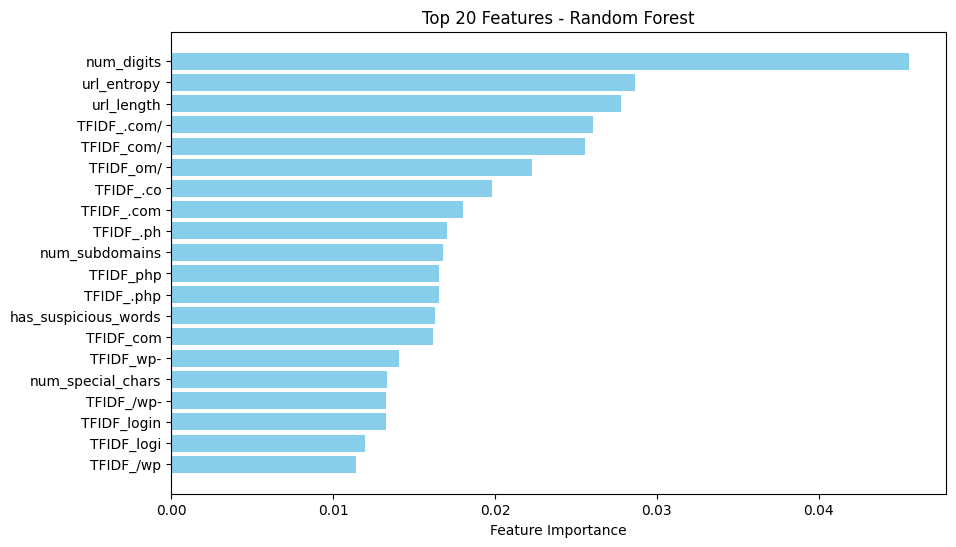


Top 20 Features for XGBoost:

TFIDF_rg/: 0.2660
TFIDF_wp-: 0.0741
has_suspicious_words: 0.0310
TFIDF_org: 0.0235
TFIDF_php: 0.0171
TFIDF_ree: 0.0162
TFIDF_pay: 0.0159
TFIDF_ogin: 0.0158
TFIDF_.ca: 0.0153
TFIDF_edu: 0.0143
TFIDF_php?: 0.0120
TFIDF_.com/: 0.0118
TFIDF_ca/: 0.0089
TFIDF_.ed: 0.0089
TFIDF_.net/: 0.0087
TFIDF_/wp: 0.0077
TFIDF_x.h: 0.0070
TFIDF_/log: 0.0070
TFIDF_ople: 0.0065
TFIDF_com.: 0.0063


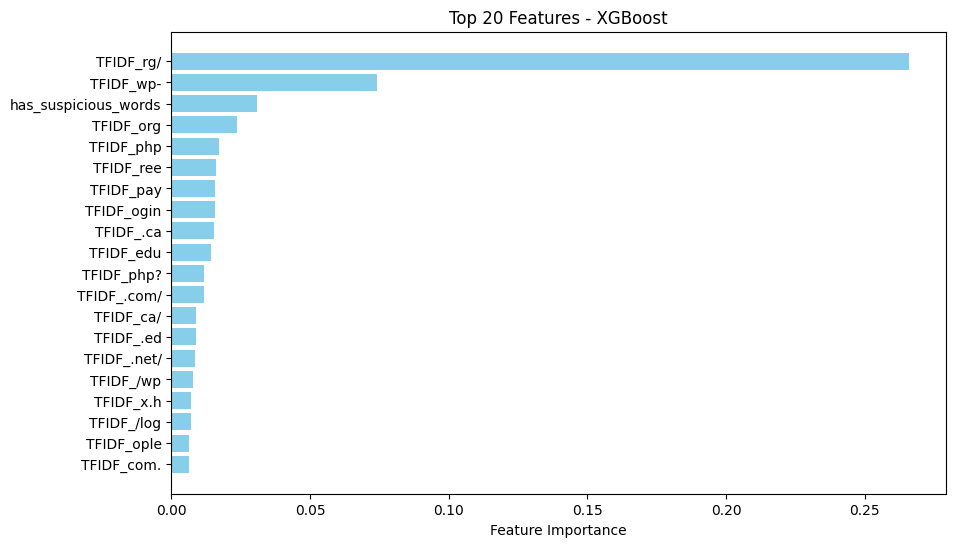


Top 20 Features for LightGBM:

num_digits: 167.0000
url_length: 88.0000
url_entropy: 64.0000
num_subdomains: 63.0000
TFIDF_htm: 53.0000
TFIDF_www: 46.0000
TFIDF_.co: 37.0000
TFIDF_.php: 35.0000
TFIDF_.com/: 33.0000
TFIDF_doc: 33.0000
num_params: 32.0000
num_special_chars: 30.0000
TFIDF_wiki: 26.0000
TFIDF_.asp: 25.0000
contains_ip: 25.0000
TFIDF_mai: 25.0000
TFIDF_.com: 24.0000
TFIDF_dat: 23.0000
0s_in_url: 23.0000
TFIDF_.ed: 22.0000


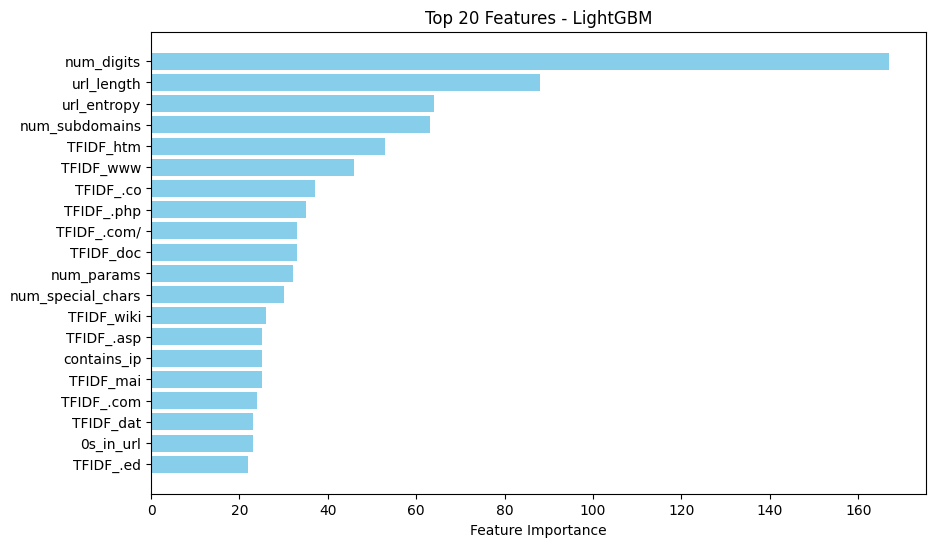

Feature Importance Analysis Complete.


In [2]:
import numpy as np

# Combine manual feature names and TF-IDF feature names
manual_feature_names = list(X_manual.columns)
tfidf_feature_names = [f"TFIDF_{feat}" for feat in tfidf_vectorizer.get_feature_names_out()]
combined_feature_names = manual_feature_names + tfidf_feature_names

# Helper function to display top features
def display_top_features(feature_importances, feature_names, top_n=20, model_name="Model"):
    indices = np.argsort(feature_importances)[::-1]  # Sort indices by importance descending
    top_features = [(feature_names[i], feature_importances[i]) for i in indices[:top_n]]

    print(f"\nTop {top_n} Features for {model_name}:\n")
    for feature, importance in top_features:
        print(f"{feature}: {importance:.4f}")

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh([feature for feature, _ in top_features][::-1],
             [importance for _, importance in top_features][::-1], color='skyblue')
    plt.xlabel("Feature Importance")
    plt.title(f"Top {top_n} Features - {model_name}")
    plt.show()

# Feature importance for models
print("Calculating Feature Importance...")

# Random Forest
if "Random Forest" in models:
    rf_importances = models['Random Forest'].feature_importances_
    display_top_features(rf_importances, combined_feature_names, model_name="Random Forest")

# XGBoost
if "XGBoost" in models:
    xgb_importances = models['XGBoost'].feature_importances_
    display_top_features(xgb_importances, combined_feature_names, model_name="XGBoost")

# LightGBM
if "LightGBM" in models:
    lgb_importances = models['LightGBM'].feature_importances_
    display_top_features(lgb_importances, combined_feature_names, model_name="LightGBM")

print("Feature Importance Analysis Complete.")
